# I. Preparation

In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

from nn_interpretability.model.model_trainer import ModelTrainer
from nn_interpretability.model.model_repository import ModelRepository
from nn_interpretability.visualization.mnist_visualizer import MnistVisualizer
from nn_interpretability.dataset.mnist_data_loader import MnistDataLoader
from nn_interpretability.interpretation.deconv.deconv import Deconvolution
from nn_interpretability.interpretation.deconv.deconv_partial_reconstruction import DeconvolutionPartialReconstruction

In [2]:
model_name = 'model_cnn.pt'

train = False

In [3]:
mnist_data_loader = MnistDataLoader()

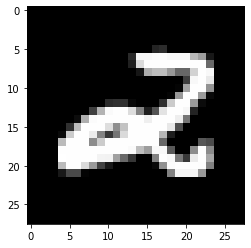

In [4]:
MnistVisualizer.show_dataset_examples(mnist_data_loader.trainloader)

In [5]:
model = ModelRepository.get_general_mnist_cnn(model_name)

if train:
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    model.train()
    ModelTrainer.train(model, criterion, optimizer, mnist_data_loader.trainloader)
    
    ModelRepository.save(model, model_name)

# II. Deconvolution

Deconvolution is a decision-based interpretability method which aims to reconstruct the input based on the output. This is achieved through building a second network which mirrors the architecture of the model under test in a reversed order. Furthermore, the deconvolutional network reuses the weights of the model under test.
Our implementations builds the deconvolutional network automatically upon the creation of the Deconvolution object. Currently, only the following layers are supported: `Conv2D`, `ReLU`, `Linear`, `MaxPOOL`. 
In the following, we are conduction two experiments: Full Input Reconstruction and Partial Input Reconstruction.

## 1. Full Input Reconstruction
In the Full Input Reconstruction. we are reusing all weights for all layers and we are aiming at the complete reconstruction of the input that has led to the model output.

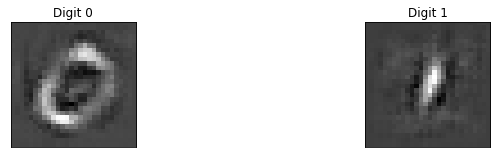

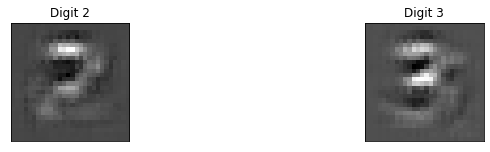

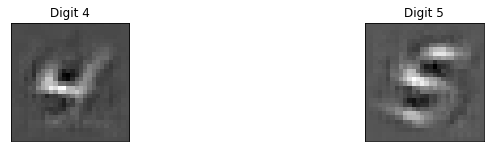

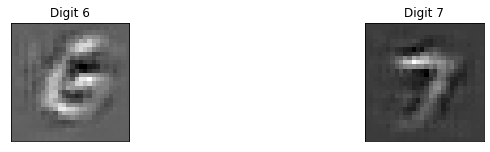

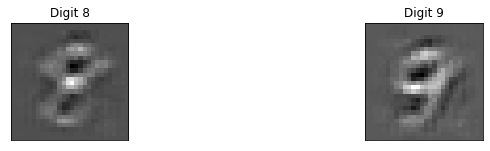

In [6]:
images = []
img_shape = (28, 28)

interpretor = Deconvolution(model, None, None)

for i in range(10):
    img = mnist_data_loader.generate_mean_image_for_class(i).expand((1, 1, 28, 28))
    out = interpretor.interpret(img)
    out = out.numpy().reshape(img_shape)
    images.append(out)

MnistVisualizer.display_images_for_each_class(images)

## 2. Partial Input Reconstruction

In the Partial Input Reconstruction experiment, we are first choosing a convolutional layer of interest. In this layer, we choose a single filter of interest and set the remainder of them to zeros. The remainder of the network does not change. Based on this, we can see what parts of the input can be reconstructed if only this filter was available. In the following cells, we are executing this procedure for every filter in every convolutional layer in our model under test.

### 2.1 Partial Input Reconstruction for the first CONV layer
We are executing the Partial Input Reconstruction for the first convolutional layer. The first image is the reconstruction achieved by only using the first filter from the first layer. The second image is the partial reconstruction using only the second filter from the first layer and so on.

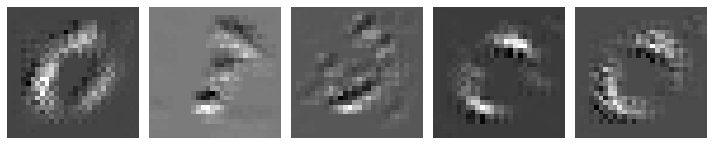

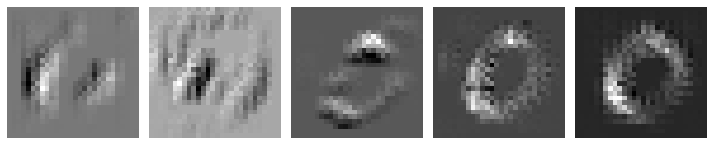

In [7]:
interpretor = DeconvolutionPartialReconstruction(model, None, None, 1)

img = mnist_data_loader.generate_mean_image_for_class(0).expand((1, 1, 28, 28))
results = interpretor.interpret(img)

MnistVisualizer.display_images(results[:5], 10, 10)
MnistVisualizer.display_images(results[5:], 10, 10)

### 2.2. Partial Input Reconstruction for the second input reconstruction

We are executing the Partial Input Reconstruction for the second convolutional layer. The first image is the reconstruction achieved by only using the first filter from the second layer. The second image is the partial reconstruction using only the second filter from the second layer and so on.

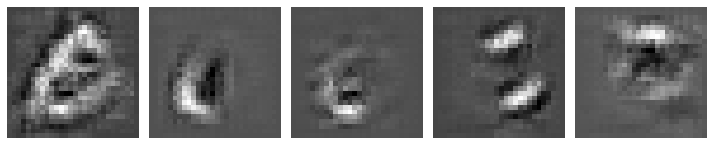

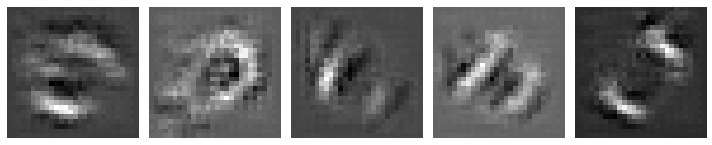

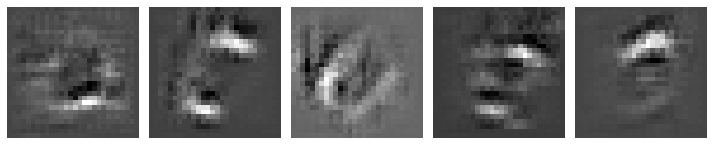

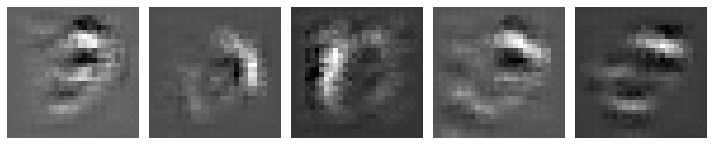

In [8]:
interpretor = DeconvolutionPartialReconstruction(model, None, None, 2)

img = mnist_data_loader.generate_mean_image_for_class(0).expand((1, 1, 28, 28))
results = interpretor.interpret(img)

MnistVisualizer.display_images(results[:5], 10, 10)
MnistVisualizer.display_images(results[5:10], 10, 10)
MnistVisualizer.display_images(results[10:15], 10, 10)
MnistVisualizer.display_images(results[15:], 10, 10)